In [3]:
import pandas as pd
import numpy as np
from collections import Counter
import random
import matplotlib.pyplot as plt

import scipy.stats
from itertools import compress
from qmplot import manhattanplot

In [4]:
pathToUkbData = "./ukb_results/"

In [28]:
# Read in centralized association results, PCs from distance-selected SNPs 
allAssocResults = [None for i in range(22)]
for chrom in range(1,23):
    resultsFile = pathToUkbData + "centralized_imp_assoc_chr" + str(chrom) + ".BMI.glm.linear"
    allAssocResults[chrom-1] = pd.read_table(resultsFile, sep="\t", usecols=["#CHROM", "POS", "ID", "P"])
    allAssocResults[chrom-1] = allAssocResults[chrom-1].dropna(how="any", axis=0)  # clean data

centralized_dist = pd.concat(allAssocResults)

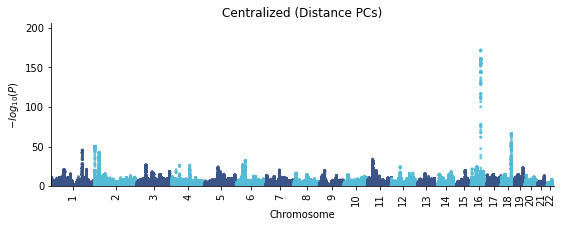

<AxesSubplot:title={'center':'Centralized (Distance PCs)'}, xlabel='Chromosome', ylabel='$-log_{10}{(P)}$'>

In [4]:
# Read in centralized association results, PCs from distance-selected SNPs 
allAssocResults = [None for i in range(22)]
for chrom in range(1,23):
    resultsFile = pathToUkbData + "centralized_imp_assoc_chr" + str(chrom) + ".BMI.glm.linear"
    allAssocResults[chrom-1] = pd.read_table(resultsFile, sep="\t", usecols=["#CHROM", "POS", "ID", "P"])
    allAssocResults[chrom-1] = allAssocResults[chrom-1].dropna(how="any", axis=0)  # clean data

centralized_dist = pd.concat(allAssocResults)
# Centralized_dist manhattan plot
manhattanplot(data=centralized_dist,
    marker = '.',
    xticklabel_kws={"rotation": "vertical"},  # set vertical or any other degrees as you like.
    suggestiveline=None,  # Turn off suggestiveline
    genomewideline=None,  # Turn off genomewideline
    is_show=True,  # display the plot in screen
    figname="centralized_distance_manhattan.png",
    title="Centralized (Distance PCs)",
    )

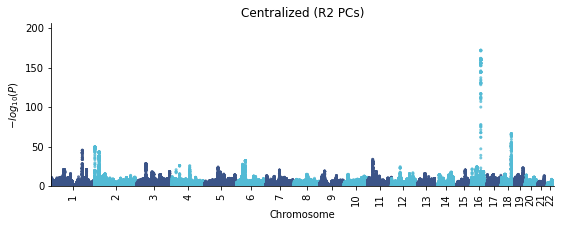

<AxesSubplot:title={'center':'Centralized (R2 PCs)'}, xlabel='Chromosome', ylabel='$-log_{10}{(P)}$'>

In [5]:
# Read in centralized association results, r2 filtered
allAssocResults = [None for i in range(22)]
for chrom in range(1,23):
    resultsFile = pathToUkbData + "centralized_imp_assoc_pc_R2_chr" + str(chrom) + ".BMI.glm.linear"
    allAssocResults[chrom-1] = pd.read_table(resultsFile, sep="\t", usecols=["#CHROM", "POS", "ID", "P"])
    allAssocResults[chrom-1] = allAssocResults[chrom-1].dropna(how="any", axis=0)  # clean data

centralized_r2 = pd.concat(allAssocResults)

# Centralized_r2 manhattan plot
manhattanplot(data=centralized_r2,
    marker = '.',
    xticklabel_kws={"rotation": "vertical"},  # set vertical or any other degrees as you like.
    suggestiveline=None,  # Turn off suggestiveline
    genomewideline=None,  # Turn off genomewideline
    is_show=True,  # display the plot in screen
    figname="centralized_distance_manhattan.png",
    title="Centralized (R2 PCs)",
    )

0.9733335824058139


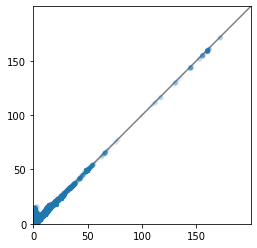

In [37]:
# centralized, dist vs r2
centralized_r2['P'] = pd.to_numeric(centralized_r2.loc[:, 'P'])
centralized_r2['-logP'] = centralized_r2.loc[:, 'P'].apply(np.log10)
centralized_r2.loc[:, '-logP'] = centralized_r2.loc[:, '-logP'].apply(lambda x: x * -1)
centralized_r2 = centralized_r2.replace([np.inf, -np.inf], np.nan)
centralized_r2 = centralized_r2.dropna(how="any", axis=0)

centralized_dist['P'] = pd.to_numeric(centralized_dist.loc[:, 'P'])
centralized_dist['-logP'] = centralized_dist.loc[:, 'P'].apply(np.log10)
centralized_dist.loc[:, '-logP'] = centralized_dist.loc[:, '-logP'].apply(lambda x: x * -1)
centralized_dist = centralized_dist.replace([np.inf, -np.inf], np.nan)
centralized_dist = centralized_dist.dropna(how="any", axis=0)

ukb_cent_both = pd.merge(centralized_r2, centralized_dist, how='inner', on=['ID']) # SNP IDs unqiue
print(np.corrcoef(ukb_cent_both['-logP_x'].to_numpy(), ukb_cent_both['-logP_y'].to_numpy())[0,1] ** 2)

_, ax = plt.subplots()
# lims = [np.min([ukb_cent_both['-logP_x'].min(), ukb_cent_both['-logP_y'].min()]),  # min of both axes
#         np.max([ukb_cent_both['-logP_x'].max(), ukb_cent_both['-logP_y'].max()]),  # max of both axes
#         ]

# plot both limits against eachother
ax.plot([0, 200], [0, 200], color="gray")
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.xticks(np.arange(0, 200, 50))
plt.yticks(np.arange(0, 200, 50))
ax.set_aspect('equal', adjustable='box')

# markers
plt.plot(ukb_cent_both['-logP_x'], ukb_cent_both['-logP_y'], 'o', alpha=0.05, markersize=4)

plt.show()

In [5]:
# Read in centralized association results, sfgwas filtered
allAssocResults = [None for i in range(22)]
for chrom in range(1,23):
    resultsFile = pathToUkbData + "centralized_imp_assoc_pc_sfgwas_chr" + str(chrom) + ".BMI.glm.linear"
    allAssocResults[chrom-1] = pd.read_table(resultsFile, sep="\t", usecols=["#CHROM", "POS", "ID", "P"])
    allAssocResults[chrom-1] = allAssocResults[chrom-1].dropna(how="any", axis=0)  # clean data

centralized_sfgwas = pd.concat(allAssocResults)
print(centralized_sfgwas.head(5))

   #CHROM    POS                                ID         P
0       1  10511                       rs534229142  0.752443
1       1  10616  1:10616_CCGCCGTTGCAAAGGCGCGCCG_C  0.775803
2       1  13453                       rs568927457  0.134157
3       1  13483                       rs554760071  0.032583
4       1  13494                       rs574697788  0.539688


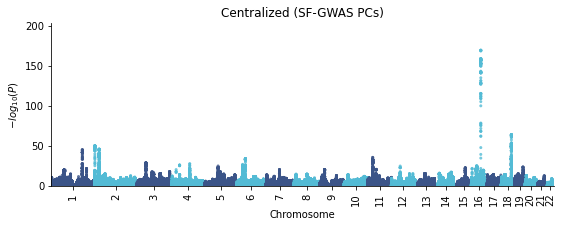

<AxesSubplot:title={'center':'Centralized (SF-GWAS PCs)'}, xlabel='Chromosome', ylabel='$-log_{10}{(P)}$'>

In [7]:
# Read in centralized association results, sfgwas filtered
allAssocResults = [None for i in range(22)]
for chrom in range(1,23):
    resultsFile = pathToUkbData + "centralized_imp_assoc_pc_sfgwas_chr" + str(chrom) + ".BMI.glm.linear"
    allAssocResults[chrom-1] = pd.read_table(resultsFile, sep="\t", usecols=["#CHROM", "POS", "ID", "P"])
    allAssocResults[chrom-1] = allAssocResults[chrom-1].dropna(how="any", axis=0)  # clean data

centralized_sfgwas = pd.concat(allAssocResults)

# Centralized_sfgwas manhattan plot
manhattanplot(data=centralized_sfgwas,
    marker = '.',
    xticklabel_kws={"rotation": "vertical"},  # set vertical or any other degrees as you like.
    suggestiveline=None,  # Turn off suggestiveline
    genomewideline=None,  # Turn off genomewideline
    is_show=True,  # display the plot in screen
    figname="centralized_distance_manhattan.png",
    title="Centralized (SF-GWAS PCs)",
    )

In [4]:
sfgwasResults_ukb = pd.read_table("./ukb_sfgwas_table.txt", delim_whitespace=True)
sfgwasResults_ukb = sfgwasResults_ukb.dropna(how="any", axis=0)  # clean data

In [20]:
print(sfgwasResults_ukb.columns)
print(centralized_sfgwas.columns)

Index(['#CHROM', 'POS', 'ID', 'P', '-logP'], dtype='object')
Index(['#CHROM', 'POS', 'ID', 'P', '-logP'], dtype='object')


In [6]:
centralized_sfgwas.head(5)

,#CHROM,POS,ID,P,-logP
0,1,10616,1:10616_CCGCCGTTGCAAAGGCGCGCCG_C,0.215477,0.666599
1,1,13453,1:13453_rs568927457_T_C,0.105607,0.976308
2,1,13483,1:13483_rs554760071_G_C,0.172976,0.762013
3,1,15585,1:15585_rs533630043_G_A,0.419585,0.377180
4,1,15777,1:15777_rs568149713_A_G,0.315984,0.500335


In [7]:
sfgwasResults_ukb.head(5)

,#CHROM,POS,ID,P,-logP
0,1,10616,1:10616_CCGCCGTTGCAAAGGCGCGCCG_C,0.215477,0.666599
1,1,13453,1:13453_rs568927457_T_C,0.105607,0.976308
2,1,13483,1:13483_rs554760071_G_C,0.172976,0.762013
3,1,15585,1:15585_rs533630043_G_A,0.419585,0.377180
4,1,15777,1:15777_rs568149713_A_G,0.315984,0.500335


0.869907380535379


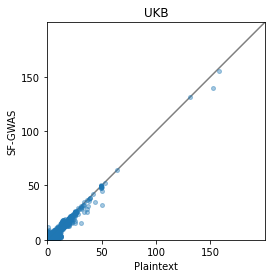

In [5]:
# sfgwas results vs centralized (sfgwas)
centralized_sfgwas['P'] = pd.to_numeric(centralized_sfgwas.loc[:, 'P'])
centralized_sfgwas['-logP'] = centralized_sfgwas.loc[:, 'P'].apply(np.log10)
centralized_sfgwas.loc[:, '-logP'] = centralized_sfgwas.loc[:, '-logP'].apply(lambda x: x * -1)
centralized_sfgwas = centralized_sfgwas.replace([np.inf, -np.inf], np.nan)
centralized_sfgwas = centralized_sfgwas.dropna(how="any", axis=0)

sfgwasResults_ukb['P'] = pd.to_numeric(sfgwasResults_ukb.loc[:, 'P'])
sfgwasResults_ukb['-logP'] = sfgwasResults_ukb.loc[:, 'P'].apply(np.log10)
sfgwasResults_ukb.loc[:, '-logP'] = sfgwasResults_ukb.loc[:, '-logP'].apply(lambda x: x * -1)
sfgwasResults_ukb = sfgwasResults_ukb.replace([np.inf, -np.inf], np.nan)
sfgwasResults_ukb = sfgwasResults_ukb.dropna(how="any", axis=0)

ukb_sfgwas_both = pd.merge(centralized_sfgwas, sfgwasResults_ukb, how='inner', on=['ID']) # SNP IDs unqiue
print(np.corrcoef(ukb_sfgwas_both['-logP_x'].to_numpy(), ukb_sfgwas_both['-logP_y'].to_numpy())[0,1] ** 2)

_, ax = plt.subplots()
lims = [np.min([ukb_sfgwas_both['-logP_x'].min(), ukb_sfgwas_both['-logP_y'].min()]),  # min of both axes
        np.max([ukb_sfgwas_both['-logP_x'].max(), ukb_sfgwas_both['-logP_y'].max()]),  # max of both axes
        ]

# plot both limits against eachother
ax.plot([0, 200], [0, 200], color="gray")
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.xticks(np.arange(0, 200, 50))
plt.yticks(np.arange(0, 200, 50))
ax.set_aspect('equal', adjustable='box')

# markers
plt.plot(ukb_sfgwas_both['-logP_x'], ukb_sfgwas_both['-logP_y'], 'o', alpha=0.4, markersize=4)

plt.xlabel("Plaintext")
plt.ylabel("SF-GWAS")
plt.title("UKB")
plt.show()

In [23]:
# Read in meta-analysis results, fixed effects 
resultsFile = pathToUkbData + "all_group_meta.meta"
metaFixedResults = pd.read_table(resultsFile, delim_whitespace=True, usecols=['CHR', 'BP', 'SNP', 'P'])
print(metaFixedResults.columns)
metaFixedResults = metaFixedResults.dropna(how="any", axis=0)  # clean data
metaFixedResults = metaFixedResults.rename(columns={'CHR':'#CHROM', 'BP':'POS', 'SNP':'ID'})

# Read in meta-analysis results, random effects 
metaRandomResults = pd.read_table(resultsFile, delim_whitespace=True, usecols=['CHR', 'BP', 'SNP', 'P(R)'])
metaRandomResults = metaRandomResults.dropna(how="any", axis=0)  # clean data
metaRandomResults = metaRandomResults.rename(columns={'CHR':'#CHROM', 'BP':'POS', 'SNP':'ID', 'P(R)': 'P'})

Index(['CHR', 'BP', 'SNP', 'P'], dtype='object')


In [27]:
print(metaFixedResults.columns)
print(metaRandomResults.columns)

Index(['#CHROM', 'POS', 'ID', 'P', '-logP'], dtype='object')
Index(['#CHROM', 'POS', 'ID', 'P'], dtype='object')


0.9887911975063596


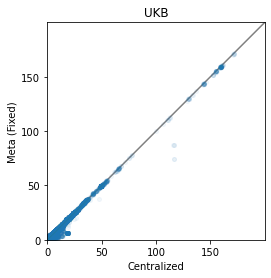

0.9132389877312737


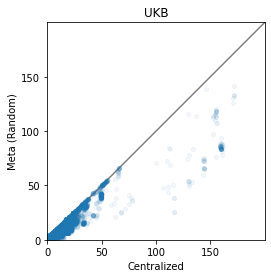

In [40]:
#  meta,fixed vs centralized (dist)
centralized_dist['P'] = pd.to_numeric(centralized_dist.loc[:, 'P'])
centralized_dist['-logP'] = centralized_dist.loc[:, 'P'].apply(np.log10)
centralized_dist.loc[:, '-logP'] = centralized_dist.loc[:, '-logP'].apply(lambda x: x * -1)
centralized_dist = centralized_dist.replace([np.inf, -np.inf], np.nan)
centralized_dist = centralized_dist.dropna(how="any", axis=0)

metaFixedResults['P'] = pd.to_numeric(metaFixedResults.loc[:, 'P'])
metaFixedResults['-logP'] = metaFixedResults.loc[:, 'P'].apply(np.log10)
metaFixedResults.loc[:, '-logP'] = metaFixedResults.loc[:, '-logP'].apply(lambda x: x * -1)
metaFixedResults = metaFixedResults.replace([np.inf, -np.inf], np.nan)
metaFixedResults = metaFixedResults.dropna(how="any", axis=0)

emerge_metaf_cent = pd.merge(centralized_dist, metaFixedResults, how='inner', on=['ID']) 
print(np.corrcoef(emerge_metaf_cent['-logP_x'].to_numpy(), emerge_metaf_cent['-logP_y'].to_numpy())[0,1] ** 2)

_, ax = plt.subplots()
lims = [np.min([emerge_metaf_cent['-logP_x'].min(), emerge_metaf_cent['-logP_y'].min()]),  # min of both axes
        np.max([emerge_metaf_cent['-logP_x'].max(), emerge_metaf_cent['-logP_y'].max()]),  # max of both axes
        ]
# plot both limits against eachother
ax.plot([0, 200], [0, 200], color="gray")
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.xticks(np.arange(0, 200, 50))
plt.yticks(np.arange(0, 200, 50))
ax.set_aspect('equal', adjustable='box')

# plot markers
plt.plot(emerge_metaf_cent['-logP_x'], emerge_metaf_cent['-logP_y'], 'o', alpha=0.05, markersize=4)

plt.xlabel("Centralized")
plt.ylabel("Meta (Fixed)")
plt.title("UKB")
plt.show()

#  meta,random vs centralized (dist)
centralized_dist['P'] = pd.to_numeric(centralized_dist.loc[:, 'P'])
centralized_dist['-logP'] = centralized_dist.loc[:, 'P'].apply(np.log10)
centralized_dist.loc[:, '-logP'] = centralized_dist.loc[:, '-logP'].apply(lambda x: x * -1)
centralized_dist = centralized_dist.replace([np.inf, -np.inf], np.nan)
centralized_dist = centralized_dist.dropna(how="any", axis=0)

metaRandomResults['P'] = pd.to_numeric(metaRandomResults.loc[:, 'P'])
metaRandomResults['-logP'] = metaRandomResults.loc[:, 'P'].apply(np.log10)
metaRandomResults.loc[:, '-logP'] = metaRandomResults.loc[:, '-logP'].apply(lambda x: x * -1)
metaRandomResults = metaRandomResults.replace([np.inf, -np.inf], np.nan)
metaRandomResults = metaRandomResults.dropna(how="any", axis=0)

emerge_metar_cent = pd.merge(centralized_dist, metaRandomResults, how='inner', on=['ID']) 
print(np.corrcoef(emerge_metar_cent['-logP_x'].to_numpy(), emerge_metar_cent['-logP_y'].to_numpy())[0,1] ** 2)

_, ax = plt.subplots()
lims = [np.min([emerge_metar_cent['-logP_x'].min(), emerge_metar_cent['-logP_y'].min()]),  # min of both axes
        np.max([emerge_metar_cent['-logP_x'].max(), emerge_metar_cent['-logP_y'].max()]),  # max of both axes
        ]
# plot both limits against eachother
ax.plot([0, 200], [0, 200], color="gray")
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.xticks(np.arange(0, 200, 50))
plt.yticks(np.arange(0, 200, 50))
ax.set_aspect('equal', adjustable='box')
# plot markers
plt.plot(emerge_metar_cent['-logP_x'], emerge_metar_cent['-logP_y'], 'o', alpha=0.05, markersize=4)


plt.xlabel("Centralized")
plt.ylabel("Meta (Random)")
plt.title("UKB")
plt.show()